# FINAL PROJECT: STUDY OF HR USING CNN 

# FER Library implementation 

In [1]:
! pip install fer

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
from fer import FER
import matplotlib.pyplot as plt 
%matplotlib inline

test_image_one = plt.imread("juan.jpg")
emo_detector = FER(mtcnn=True)
# Capture all the emotions on the image
captured_emotions = emo_detector.detect_emotions(test_image_one)
# Print all captured emotions with the image
print(captured_emotions)
plt.imshow(test_image_one)

# Use the top Emotion() function to call for the dominant emotion in the image
dominant_emotion, emotion_score = emo_detector.top_emotion(test_image_one)
print(dominant_emotion, emotion_score)

FileNotFoundError: [Errno 2] No such file or directory: 'juan.jpg'

In [ ]:
#captured_emotions
emotions = captured_emotions[0]['emotions']

per = [ ]
for n in emotions:  
   per.append(emotions.get(n))
   print(per)



In [ ]:
per

# Creating our own CNN

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.º
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
pwd

In [ ]:
! pip install scikit-plot
! pip install tensorflow

In [ ]:
import math
import numpy as np
import pandas as pd


import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

import tensorflow as tf


from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils

In [ ]:
data = pd.read_csv('/Users/juan/Desktop/IE/3RD YEAR/2ND SEMESTER/MACHINE LEARNING ANALYTICS/FINAL PROJECT/fer2013.csv')
print(data.shape)
data.head()

In [ ]:
data.Usage.value_counts()

In [8]:
emotion_map = {0: 'Angry', 1: 'Digust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
emotion_counts = data['emotion'].value_counts(sort=False).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_map)
emotion_counts

,emotion,number
0,Angry,4953
1,Digust,547
2,Fear,5121
3,Happy,8989
4,Sad,6077
5,Surprise,4002
6,Neutral,6198


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


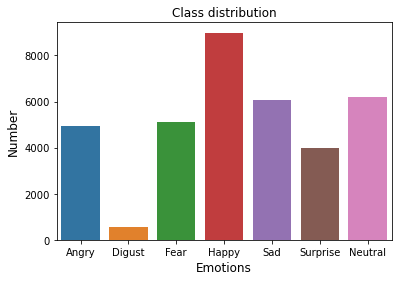

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.barplot(emotion_counts.emotion, emotion_counts.number)
plt.title('Class distribution')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Emotions', fontsize=12)
plt.show()

<ipython-input-10-483c62a7888b>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([image.astype(np.uint8), emotion])
<ipython-input-10-483c62a7888b>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([image.astype(np.uint8), emotion])
<ipython-input-10-483c62a7888b>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the 

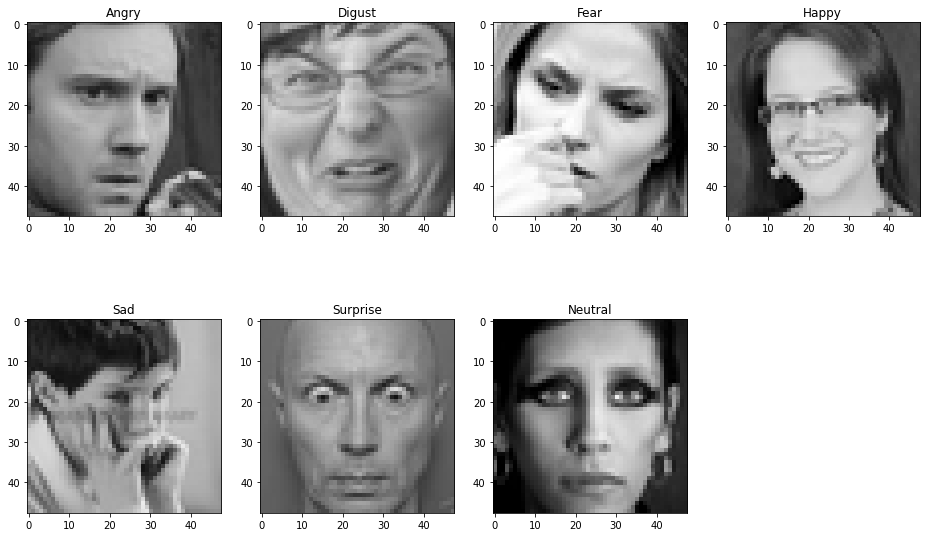

In [10]:
def row2image(row):
    pixels, emotion = row['pixels'], emotion_map[row['emotion']]
    img = np.array(pixels.split())
    img = img.reshape(48,48)
    image = np.zeros((48,48,3))
    image[:,:,0] = img
    image[:,:,1] = img
    image[:,:,2] = img
    return np.array([image.astype(np.uint8), emotion])

plt.figure(0, figsize=(16,10))
for i in range(1,8):
    face = data[data['emotion'] == i-1].iloc[0]
    img = row2image(face)
    plt.subplot(2,4,i)
    plt.imshow(img[0])
    plt.title(img[1])

plt.show()  

In [11]:
data_train = data[data['Usage']=='Training'].copy()
data_val   = data[data['Usage']=='PublicTest'].copy()
data_test  = data[data['Usage']=='PrivateTest'].copy()
print("train shape: {}, \nvalidation shape: {}, \ntest shape: {}".format(data_train.shape, data_val.shape, data_test.shape))

train shape: (28709, 3), 
validation shape: (3589, 3), 
test shape: (3589, 3)


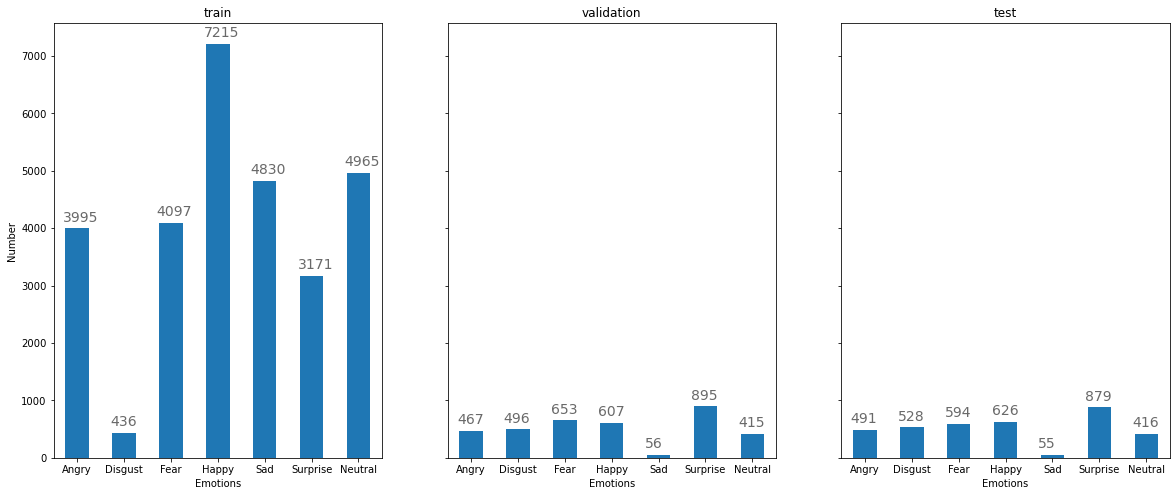

In [12]:
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

def setup_axe(axe,df,title):
    df['emotion'].value_counts(sort=False).plot(ax=axe, kind='bar', rot=0)
    axe.set_xticklabels(emotion_labels)
    axe.set_xlabel("Emotions")
    axe.set_ylabel("Number")
    axe.set_title(title)
    
    # set individual bar lables using above list
    for i in axe.patches:
        # get_x pulls left or right; get_height pushes up or down
        axe.text(i.get_x()-.05, i.get_height()+120, \
                str(round((i.get_height()), 2)), fontsize=14, color='dimgrey',
                    rotation=0)

   
fig, axes = plt.subplots(1,3, figsize=(20,8), sharey=True)
setup_axe(axes[0],data_train,'train')
setup_axe(axes[1],data_val,'validation')
setup_axe(axes[2],data_test,'test')
plt.show()


In [13]:
#initilize parameters
num_classes = 7 
width, height = 48, 48
num_epochs = 50
batch_size = 64
num_features = 64

In [14]:
from tensorflow.keras.utils import to_categorical


In [17]:
# CRNO stands for Convert, Reshape, Normalize, One-hot encoding
# (i) convert strings to lists of integers
# (ii) reshape and normalise grayscale image with 255.0
# (iii) one-hot encoding label, e.g. class 3 to [0,0,0,1,0,0,0]

def CRNO(df, dataName):
    df['pixels'] = df['pixels'].apply(lambda pixel_sequence: [int(pixel) for pixel in pixel_sequence.split()])
    data_X = np.array(df['pixels'].tolist(), dtype='float32').reshape(-1,width, height,1)/255.0   
    data_Y = tf.keras.utils.to_categorical(df['emotion'], num_classes)  
    print(dataName, "_X shape: {}, ", dataName, "_Y shape: {}".format(data_X.shape, data_Y.shape))
    return data_X, data_Y

    
train_X, train_Y = CRNO(data_train, "train") #training data
val_X, val_Y     = CRNO(data_val, "val") #validation data
test_X, test_Y   = CRNO(data_test, "test") #test data


train _X shape: {},  train _Y shape: (28709, 48, 48, 1)
val _X shape: {},  val _Y shape: (3589, 48, 48, 1)
test _X shape: {},  test _Y shape: (3589, 48, 48, 1)


In [18]:
test_X

array([[[[0.6666667 ],
         [0.4627451 ],
         [0.39607844],
         ...,
         [0.4392157 ],
         [0.5137255 ],
         [0.4862745 ]],

        [[0.65882355],
         [0.49019608],
         [0.42352942],
         ...,
         [0.43529412],
         [0.4862745 ],
         [0.52156866]],

        [[0.6784314 ],
         [0.5254902 ],
         [0.44313726],
         ...,
         [0.40392157],
         [0.44705883],
         [0.5019608 ]],

        ...,

        [[0.32156864],
         [0.41568628],
         [0.3882353 ],
         ...,
         [0.6431373 ],
         [0.5176471 ],
         [0.49803922]],

        [[0.3764706 ],
         [0.4117647 ],
         [0.38431373],
         ...,
         [0.63529414],
         [0.50980395],
         [0.5176471 ]],

        [[0.40784314],
         [0.40392157],
         [0.3882353 ],
         ...,
         [0.62352943],
         [0.52156866],
         [0.5137255 ]]],


       [[[0.02745098],
         [0.01960784],
         [0.03

In [19]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [20]:
model = Sequential()

#module 1
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), input_shape=(width, height, 1), data_format='channels_last'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#module 2
model.add(Conv2D(2*num_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(2*num_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#module 3
model.add(Conv2D(num_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(num_features, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#flatten
model.add(Flatten())

#dense 1
model.add(Dense(2*2*2*num_features))
model.add(BatchNormalization())
model.add(Activation('relu'))

#dense 2
model.add(Dense(2*2*num_features))
model.add(BatchNormalization())
model.add(Activation('relu'))

#dense 3
model.add(Dense(2*num_features))
model.add(BatchNormalization())
model.add(Activation('relu'))

#output layer
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7), 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 256)       2560      
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 46, 46, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 46, 46, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 46, 46, 256)       0

/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [17]:
# data generator
data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)


es = EarlyStopping(monitor='val_loss', patience = 10, mode = 'min', restore_best_weights=True)

history = model.fit_generator(data_generator.flow(train_X, train_Y, batch_size),
                                steps_per_epoch=len(train_X) / batch_size,
                                epochs=num_epochs,
                                verbose=2, 
                                callbacks = [es],
                                validation_data=(val_X, val_Y))

Epoch 1/50


C:\Users\juan\AppData\Local\Temp\ipykernel_15588\3362797953.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(data_generator.flow(train_X, train_Y, batch_size),


448/448 - 113s - loss: 1.6908 - accuracy: 0.3273 - val_loss: 1.8052 - val_accuracy: 0.2912 - 113s/epoch - 251ms/step
Epoch 2/50
448/448 - 103s - loss: 1.4121 - accuracy: 0.4536 - val_loss: 1.4656 - val_accuracy: 0.4522 - 103s/epoch - 229ms/step
Epoch 3/50
448/448 - 102s - loss: 1.2642 - accuracy: 0.5180 - val_loss: 1.3092 - val_accuracy: 0.5007 - 102s/epoch - 228ms/step
Epoch 4/50
448/448 - 106s - loss: 1.1827 - accuracy: 0.5481 - val_loss: 1.8138 - val_accuracy: 0.4374 - 106s/epoch - 236ms/step
Epoch 5/50
448/448 - 106s - loss: 1.1333 - accuracy: 0.5676 - val_loss: 1.2294 - val_accuracy: 0.5422 - 106s/epoch - 235ms/step
Epoch 6/50
448/448 - 103s - loss: 1.0952 - accuracy: 0.5823 - val_loss: 1.1628 - val_accuracy: 0.5623 - 103s/epoch - 229ms/step
Epoch 7/50
448/448 - 102s - loss: 1.0604 - accuracy: 0.5975 - val_loss: 1.0718 - val_accuracy: 0.5963 - 102s/epoch - 228ms/step
Epoch 8/50
448/448 - 102s - loss: 1.0295 - accuracy: 0.6098 - val_loss: 1.2045 - val_accuracy: 0.5609 - 102s/epoch 

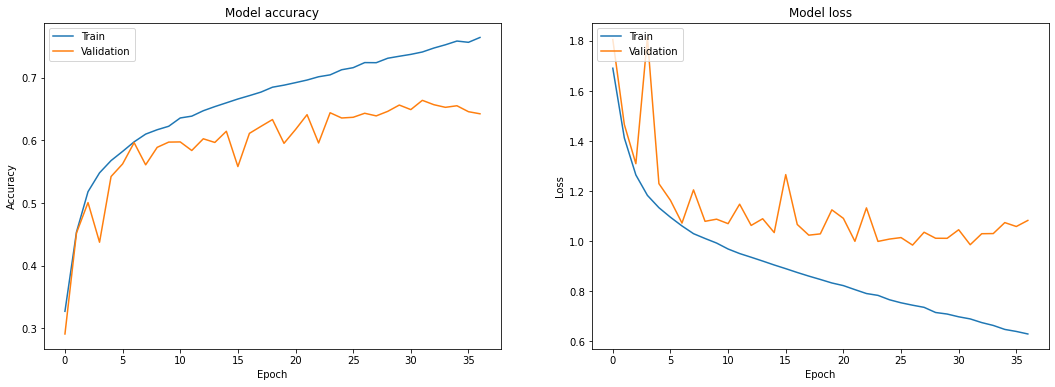

In [20]:
fig, axes = plt.subplots(1,2, figsize=(18, 6))
# Plot training & validation accuracy values
axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [71]:
from sklearn.metrics import accuracy_score 
test_true = np.argmax(test_Y, axis=1)
test_pred = np.argmax(model.predict(test_X), axis=1)
print("CNN Model Accuracy on test set: {:.4f}".format(accuracy_score(test_true, test_pred)))

CNN Model Accuracy on test set: 0.4709


In [24]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

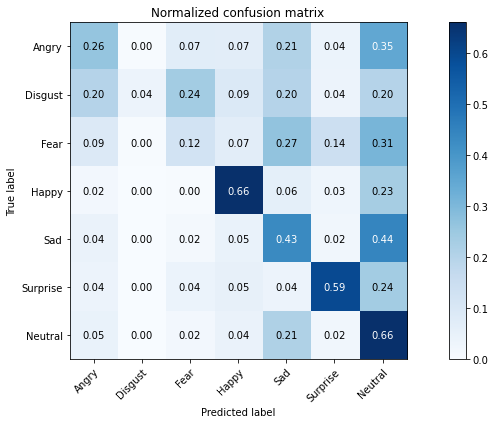

In [34]:
# Plot normalized confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
plot_confusion_matrix(test_true, test_pred, classes=emotion_labels, normalize=True, title='Normalized confusion matrix')
plt.show()

In [35]:
model.save('Final Project Neural Networks Model.h5')

In [22]:
import keras
new_model = keras.models.load_model("Final Project Neural Networks Model.h5")

In [24]:
new_predictions = new_model.predict(test_X)
new_predictions

array([[3.3481464e-01, 1.0123278e-02, 2.0112605e-01, ..., 2.6757497e-01,
        4.3605782e-02, 1.3490847e-01],
       [7.1349122e-02, 2.7515382e-05, 1.4125691e-01, ..., 3.3832335e-01,
        2.3575976e-02, 4.0569809e-01],
       [5.5238668e-02, 1.0415575e-03, 2.1385343e-01, ..., 4.4489908e-01,
        8.7686339e-03, 2.6475254e-01],
       ...,
       [3.5558605e-01, 2.5537243e-04, 1.0538699e-01, ..., 1.2214278e-01,
        1.2457420e-01, 2.3611668e-01],
       [9.0539992e-02, 2.1447225e-03, 1.3180314e-01, ..., 2.7785683e-01,
        1.8517109e-02, 4.1005325e-01],
       [1.5975682e-01, 3.6898344e-03, 3.6829019e-01, ..., 4.1559345e-01,
        8.2850043e-04, 3.0727642e-02]], dtype=float32)

In [25]:
newpred_df = pd.DataFrame(data= new_predictions)

In [26]:
newpred_df

,0,1,2,3,4,5,6
0,0.334815,0.010123,0.201126,0.007847,0.267575,0.043606,0.134908
1,0.071349,0.000028,0.141257,0.019769,0.338323,0.023576,0.405698
2,0.055239,0.001042,0.213853,0.011446,0.444899,0.008769,0.264753
3,0.176627,0.003288,0.161717,0.035966,0.193459,0.037992,0.390950
4,0.161091,0.005401,0.165371,0.033188,0.168697,0.144041,0.322211
...,...,...,...,...,...,...,...
3584,0.116352,0.003424,0.132797,0.027871,0.188954,0.039719,0.490882
3585,0.031213,0.000190,0.061712,0.605822,0.125489,0.100281,0.075294
3586,0.355586,0.000255,0.105387,0.055938,0.122143,0.124574,0.236117
3587,0.090540,0.002145,0.131803,0.069085,0.277857,0.018517,0.410053


In [130]:
new_model.predict(test_X)

array([[3.34813297e-01, 1.01233013e-02, 2.01125965e-01, ...,
        2.67575681e-01, 4.36058976e-02, 1.34909019e-01],
       [7.13489950e-02, 2.75152524e-05, 1.41256943e-01, ...,
        3.38323444e-01, 2.35759690e-02, 4.05698180e-01],
       [5.52388653e-02, 1.04155997e-03, 2.13853344e-01, ...,
        4.44898248e-01, 8.76868330e-03, 2.64753103e-01],
       ...,
       [3.55585694e-01, 2.55372550e-04, 1.05387084e-01, ...,
        1.22142836e-01, 1.24574490e-01, 2.36116573e-01],
       [9.05400366e-02, 2.14472646e-03, 1.31803155e-01, ...,
        2.77856708e-01, 1.85171161e-02, 4.10053223e-01],
       [1.59756929e-01, 3.68983392e-03, 3.68290156e-01, ...,
        4.15593386e-01, 8.28500779e-04, 3.07276286e-02]], dtype=float32)

# Generalizing our CNN 

Now we will transform our CNN to be able to take as an output different pictures, as for the moment it is only able to recognize images with the format included on the dataset (48,48 pixels and black and white colors) 

In [145]:
test_X[3000,47,47,0]

0.94509804

In [117]:
from PIL import Image
photo = Image.open('neutral.jpg')
# print(img.format, img.size, img.mode)
ndarray = np.array(photo)

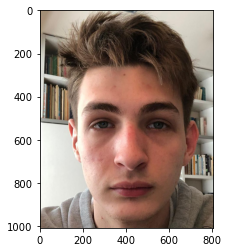

In [118]:
plt.imshow(photo)

We need to adapt our CNN as mentioned before. In order to do this we will transform the input pictures to the format needed. Then we will call the predict function to apply our CNN to the pictures and get the percentage for each emotion. Finally we will present the results in a barplot.

In [121]:
import PIL
image = Image.open('neutral.jpg').convert('L')
pro_image = image.resize((48, 48))
pro_image.save('pro_image.jpg')

In [122]:
ar_image = np.asarray(PIL.Image.open('pro_image.jpg')) # Array containing the pixels
ar_image = ar_image/255.0  # Normalize the values 
type(ar_image)
ar_image.shape
ar_image # Array containing the normalized pixels

array([[0.57647059, 0.56470588, 0.58823529, ..., 0.83137255, 0.81960784,
        0.80784314],
       [0.56470588, 0.60784314, 0.67058824, ..., 0.81568627, 0.80784314,
        0.8       ],
       [0.5254902 , 0.58823529, 0.65882353, ..., 0.80784314, 0.80392157,
        0.8       ],
       ...,
       [0.48627451, 0.55686275, 0.6       , ..., 0.27843137, 0.34901961,
        0.39215686],
       [0.43137255, 0.49019608, 0.51372549, ..., 0.30196078, 0.36862745,
        0.38431373],
       [0.46666667, 0.43137255, 0.45098039, ..., 0.29019608, 0.34901961,
        0.35294118]])

In [33]:
test_Image = np.zeros((1,48,48,1)) # Create an empty array according to the dimensions needed by our neural network. 
test_Image[0,0:47,0:47,0] = ar_image[0:47,0:47] # Introduce the values for our normalized pixels as the values 
                                                # in the second and third dimensions, respectively. 


#test_Image[0,0,1,0]

In [34]:
new_model.predict(test_Image) # Final array containing percentages for each emotion


array([[1.5374936e-01, 4.8227046e-04, 7.9789259e-02, 2.5935501e-02,
        1.8499868e-01, 3.7240076e-03, 5.5132091e-01]], dtype=float32)

In [35]:
res = new_model.predict(test_Image)[0]
res = [float(i) for i in res] # Convert the values to float type to ease the process of reading. 
res

[0.15374936163425446,
 0.00048227046499960124,
 0.07978925853967667,
 0.025935500860214233,
 0.18499867618083954,
 0.003724007634446025,
 0.5513209104537964]

Create a barplot to ease the interpretation process

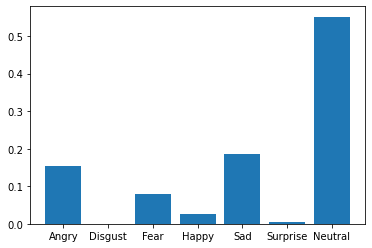

In [36]:
import numpy as np
import matplotlib.pyplot as plt

emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

y_pos = np.arange(len(emotion_labels))

# Create bars
plt.bar(y_pos, res)

# Create names on the x-axis
plt.xticks(y_pos, emotion_labels )

# Show graphic
plt.show()

Creating function to summarise mycnn network procedures

In [37]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# image = Image.open('juan.jpg').convert('L')



def mycnn(photo):
    image = Image.open(photo).convert('L')
    pro_image = image.resize((48, 48))
    pro_image.save('pro_image.jpg')
    ar_image = np.asarray(PIL.Image.open('pro_image.jpg'))
    ar_image = ar_image/255.0  
    test_Image = np.zeros((1,48,48,1))
    test_Image[0,0:47,0:47,0] = ar_image[0:47,0:47]
    new_model.predict(test_Image)
    res = new_model.predict(test_Image)[0]
    res = [float(i) for i in res]
    emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    y_pos = np.arange(len(emotion_labels))
    # Create bars
    plt.bar(y_pos, res)
    # Create names on the x-axis
    plt.xticks(y_pos, emotion_labels )
    # Show graphic
    graph = plt.show()
    return graph


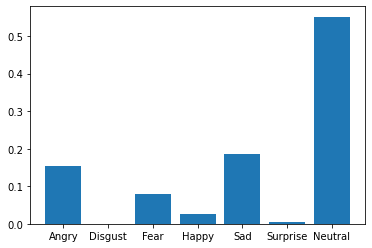

In [115]:
# mycnn(image)
mycnn('neutral.jpg')

# Comparing our CNN vs FER

Creating functions to automatize FER processes 

FUNCTION 1: Print Image

In [104]:
def fershow(photo):
    test_image_one = plt.imread(photo)
    plt.imshow(test_image_one)

FUNCTION 2: Return FER Percentages 

In [102]:
def fergraph(photo):
    test_image_one = plt.imread(photo)
    emo_detector = FER(mtcnn=True)
    # Capture all the emotions on the image
    captured_emotions = emo_detector.detect_emotions(test_image_one)
    # Print all captured emotions with the image
    #print(captured_emotions)
    #plt.imshow(test_image_one)

    # Use the top Emotion() function to call for the dominant emotion in the image
    dominant_emotion, emotion_score = emo_detector.top_emotion(test_image_one)
    
    
    #print(dominant_emotion, emotion_score)
    emotions = captured_emotions[0]['emotions']

    per = [ ]
    for n in emotions:  
        per.append(emotions.get(n))
    emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    y_pos = np.arange(len(emotion_labels))
    # Create bars
    plt.bar(y_pos, per)
    # Create names on the x-axis
    plt.xticks(y_pos, emotion_labels )
    # Show graphic
    graph = plt.show()
    return graph

**TESTING FOR EMOTIONS**

**Emotion 1: Neutral**

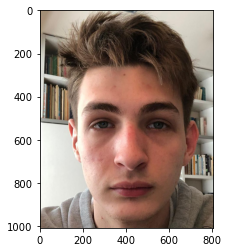

In [145]:
ferprint('neutral.jpg')

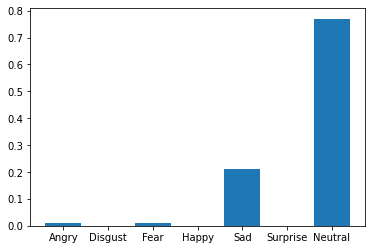

In [146]:
fergraph('neutral.jpg')

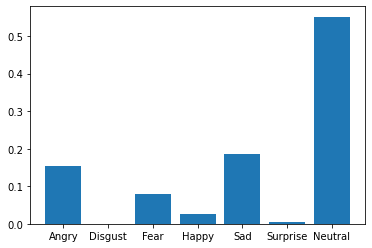

In [147]:
mycnn('neutral.jpg')

**Emotion 2: Sad**

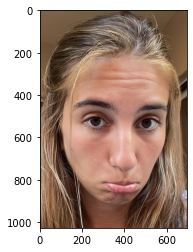

In [148]:
fershow('triste.jpg')

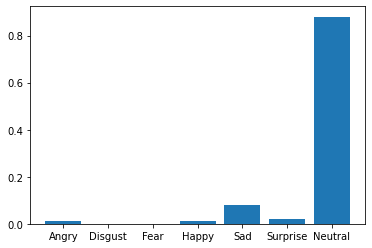

In [149]:
fergraph('triste.jpg')

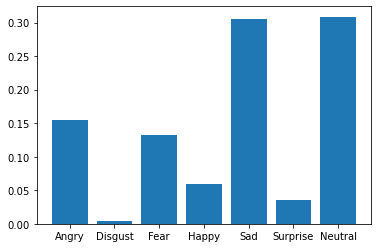

In [144]:
mycnn('triste.jpg')

**Emotion 3: Surprised** 

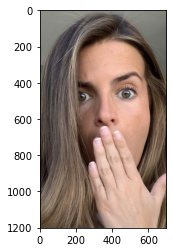

In [137]:
fershow('sorpresa.jpg')

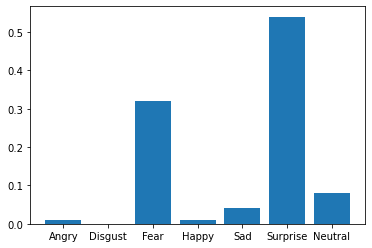

In [139]:
fergraph('sorpresa.jpg')

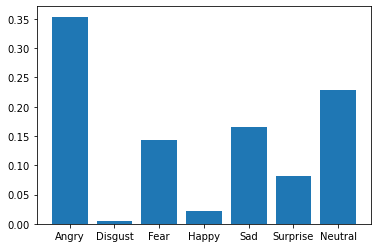

In [140]:
mycnn('sorpresa.jpg')

**Emotion 4: Sad**

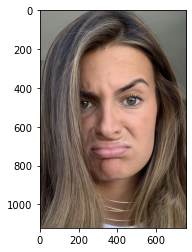

In [133]:
fershow('asco.jpg')

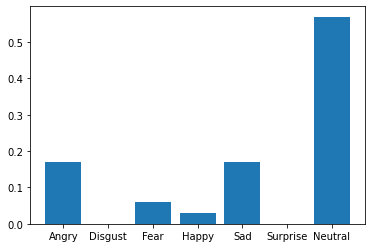

In [155]:
fergraph('asco.jpg')

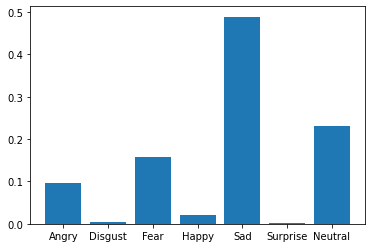

In [136]:
mycnn('asco.jpg')

**Emotion 5: Happy**

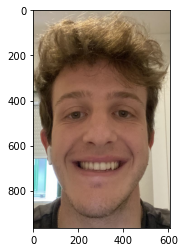

In [130]:
ferprint('contento.jpeg')

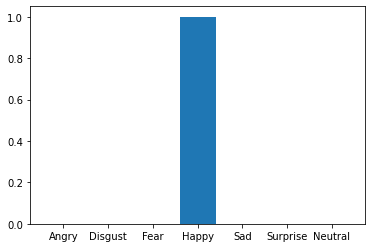

In [131]:
fergraph('contento.jpeg')

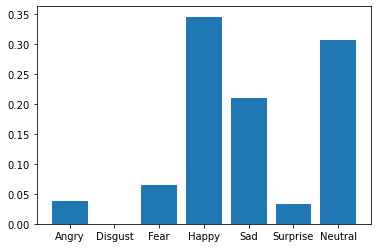

In [132]:
mycnn('contento.jpeg')